# Quality control

Here I want to check the data for any weird spikes and 
1. in th EB dataset: for the diving event 2016/2017 cut out the data from 100m and set to 250m and then replace the 100m values with nans
2. cut out weird spike in WB1 dataset 
3. WB datasets: create a 3rd dimension in both datasets
4. concat along a 3rd dimension and use mean of both datasets where 2 values exist

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_name = "data/rtwb1_all_merged.nc"
ds_wb1 = xr.open_dataset(file_name)

In [4]:
file_name = "data/rtwb2_all_merged.nc"
ds_wb2 = xr.open_dataset(file_name)

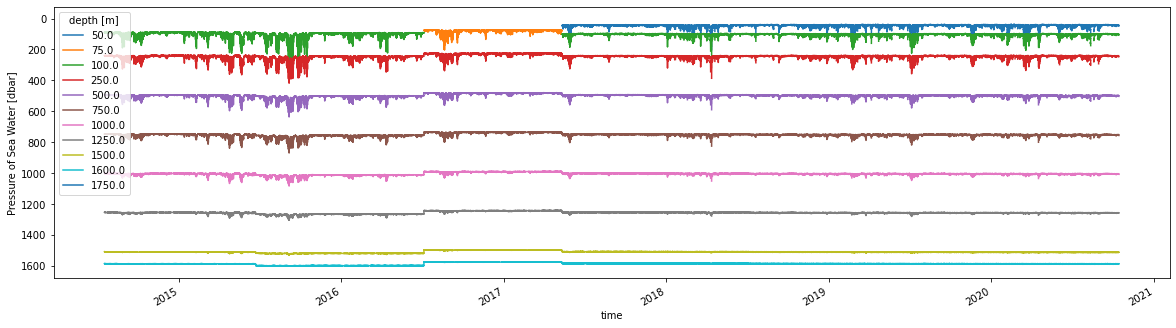

In [5]:
ds_wb1.pres.where(ds_wb1.pres>0).plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
# need to remove the spike

In [6]:
ds_wb1 = ds_wb1.where(ds_wb1.pres>0)

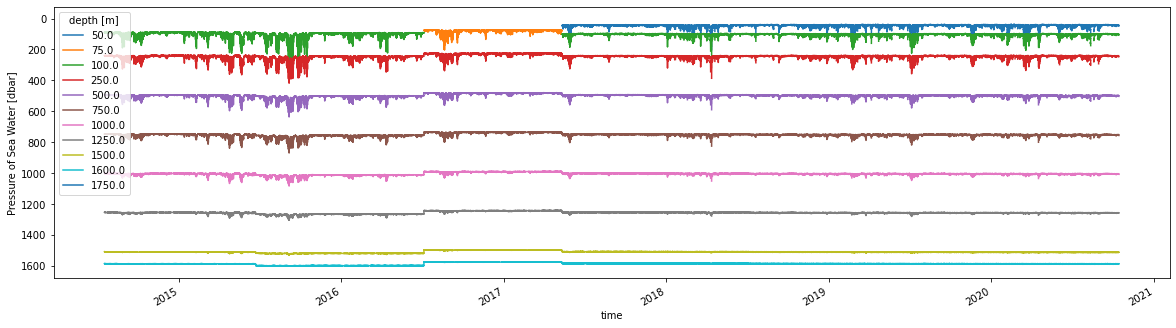

In [7]:
ds_wb1.pres.plot.line(x='time', figsize = (20,5), yincrease = False);

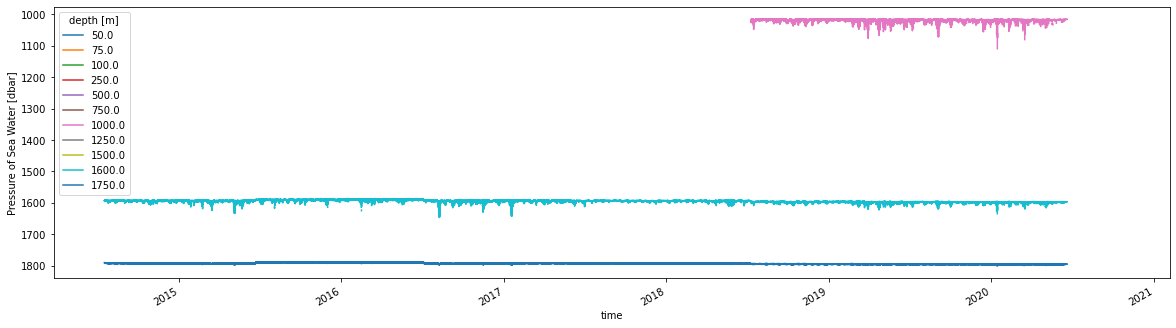

In [8]:
ds_wb2.pres.plot.line(x='time', figsize = (20,5), yincrease = False); #.where(ds.pres>0);
# this looks good

In [9]:
ds_wb = xr.concat([ds_wb1, ds_wb2], dim='time')

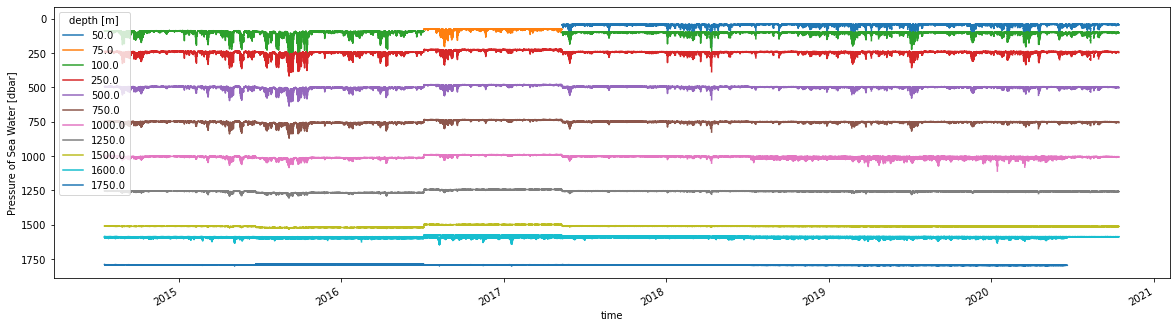

In [10]:
ds_wb.pres.plot.line(x='time', figsize = (20,5), yincrease = False);

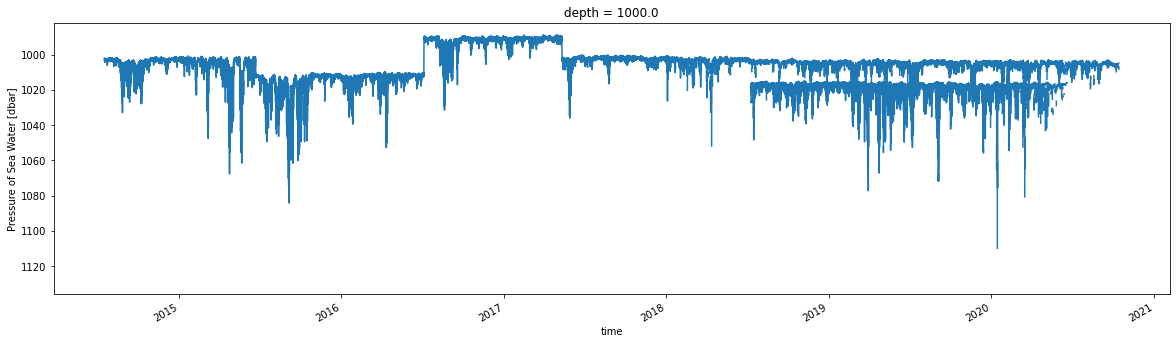

In [11]:
ds_wb.pres.sel(depth=1000).plot.line(x='time', figsize = (20,5), yincrease = False);

# picking the bits I want to combine into my final dataset

In [12]:
ds_wb1 = ds_wb1.resample(time = "1D").mean(keep_attrs=True);
ds_wb2 = ds_wb2.resample(time = "1D").mean(keep_attrs=True);

In [13]:
ds_wb1000 = (ds_wb1.sel(depth=1000) +  ds_wb1.sel(depth=1000))/2
ds_wb1600 = (ds_wb1.sel(depth=1600) +  ds_wb1.sel(depth=1600))/2
ds_wb1750 = ds_wb2.sel(depth=1750)

In [14]:
#ds_wb1 = ds_wb.drop_sel(depth=[1000])
#ds_wb1 = ds_wb.drop_sel(depth=[1600])

In [15]:
ds_wbs = xr.concat([ds_wb1000, ds_wb1600, ds_wb1750],dim='depth')

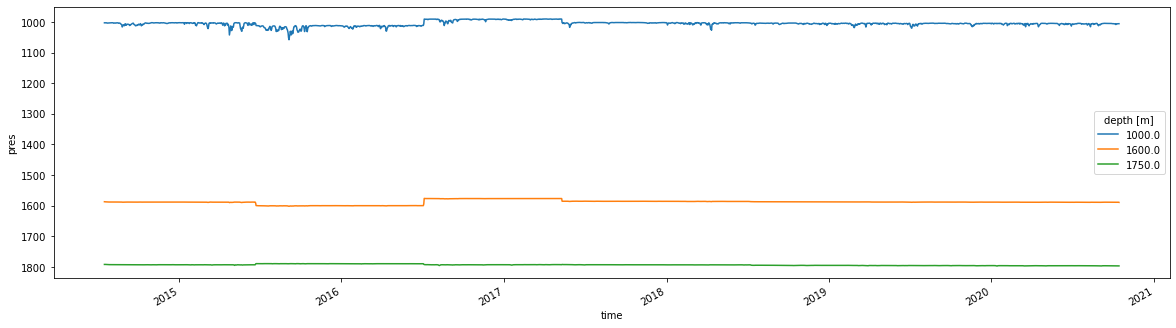

In [16]:
ds_wbs.pres.plot.line(x='time', figsize = (20,5),yincrease=False);

In [17]:
ds_wb = xr.concat([ds_wb1, ds_wbs],dim='time')

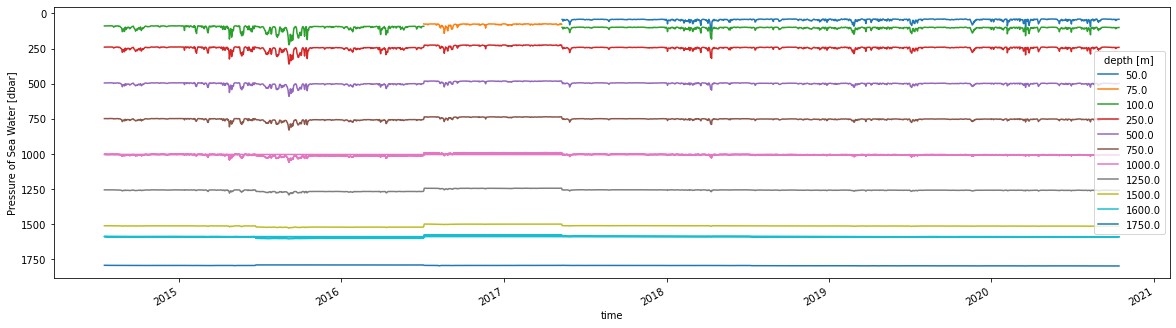

In [18]:
ds_wb.pres.plot.line(x='time', figsize = (20,5),yincrease=False);

In [19]:
ds_wb.to_netcdf('data/rtwb_qc_1D.nc', 
        engine='netcdf4',
        encoding={'time':{'units':'days since 1900-01-01 00:00:00'}})

In [20]:
# I cheated a bit and the MHW algorithm does not like it...